## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#%matplotlib inline

# Tweaking Data

## DataFrames. Accidents

In [2]:
accidents = pd.read_csv('/Users/fcbnyc/mystuff/repos/BarcelonaAccidents/total_accidents_2018.csv',)
accidents.drop('Unnamed: 0', axis=1,inplace=True)
accidents.isnull().sum().sum()

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0

In [3]:
print("Total deaths: ",accidents['#_deaths'].sum(),'\n')
print("Total accidents: ",accidents['incident_#'].count(),'\n')

Total deaths:  241.0 

Total accidents:  86686 



## Plotting

# Graphs to get:
1. Compare accidents per year with a deads per year. What is the ratio of deads per accident?
2. Deads/Accidents per month.
3. Deads/Accidents per week day, weekend and more. 
4. Deads/Accidents per hour of day.
5. Deads/Accidents per district.

## 1. Compare accidents per year with a deads per year. What is the ratio of deads per accident?

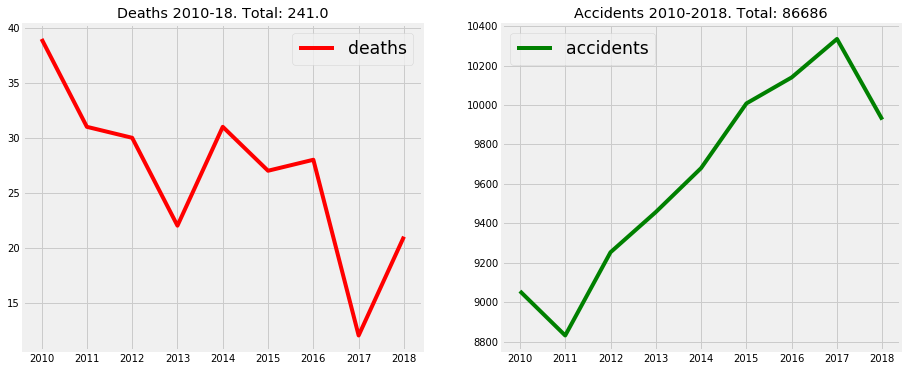

In [4]:
deads_per_year = accidents.groupby('year').sum()['#_deaths']
accidents_per_year = accidents.groupby('year').count()['incident_#']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.plot(deads_per_year, color='r', label ='Deaths_per_year')
ax2.plot(accidents_per_year, color='g', label='Accidents_per_year.')

ax1.set_title('Deaths 2010-18. Total: {}'.format(round(accidents['#_deaths'].sum(), 0)))
ax2.set_title('Accidents 2010-2018. Total: {}'.format(len(accidents)))
#plt.legend([ax1, ax2],["Deads", "Accidents"])
ax1.legend(["deaths"], fontsize ='xx-large')
ax2.legend(["accidents"], fontsize ='xx-large')


plt.savefig('./charts/accidents_deaths_per_year_2018.png');

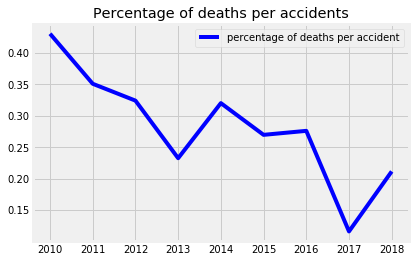

In [5]:
ratio = []
year = list(range(2010, 2019))
for x, z in zip(deads_per_year, accidents_per_year):
    ratio.append((x/z)*100)
#print(ratio)
plt.plot(year, ratio, color='blue', label='percentage of deaths per accident');
average_deads_per_accident = sum(ratio)/8
#plt.axhline(average_deads_per_accident, c='b', label='average of Deads per accident')
plt.legend()
plt.title('Percentage of deaths per accidents');
plt.savefig('./charts/avg_deaths_accident_per_year_2018.png');
### The ratio of deads per accident has been decrasing since 2010


## 2. Deads/Accidents per month.

In [7]:
mes = accidents.groupby('month_name').agg({'#_deaths': 'sum','incident_#': 'count'})
mes = mes.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',\
'September', 'October', 'November','December'])
mes.columns = ['deaths_per_month', 'accidents_per_month']
mes

,deaths_per_month,accidents_per_month
month_name,,
January,20.0,6937
February,22.0,7033
March,24.0,7512
April,23.0,7207
May,16.0,7717
June,13.0,7456
July,21.0,7599
August,26.0,5430
September,29.0,6856


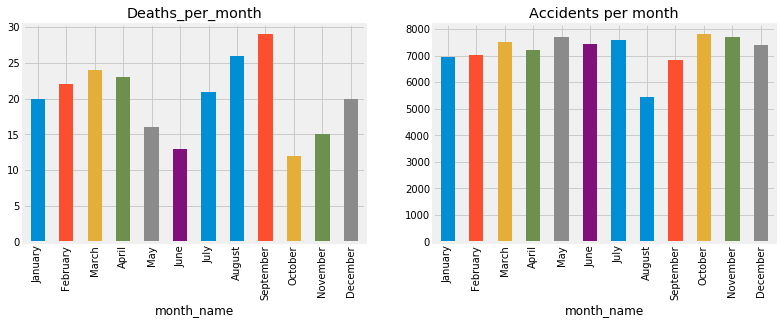

In [8]:
# mes['deaths_per_month'] =deaths_per_month
# mes['accidents_per_month'] = accidents_per_month
mes['average'] = mes['deaths_per_month']/mes['accidents_per_month']


fig, axes = plt.subplots(1,2, figsize=(12,4))
mes['deaths_per_month'].plot(kind='bar', ax=axes[0], title='Deaths_per_month');
mes['accidents_per_month'].plot(kind='bar', ax=axes[1], title='Accidents per month');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_month_2018.png');

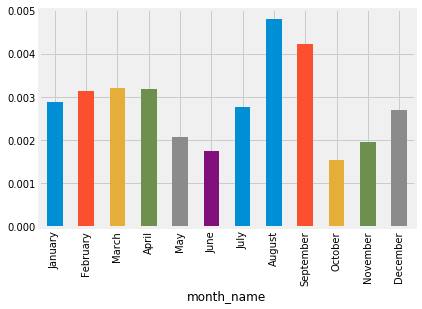

In [9]:
mes['average'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_month_2018.png');

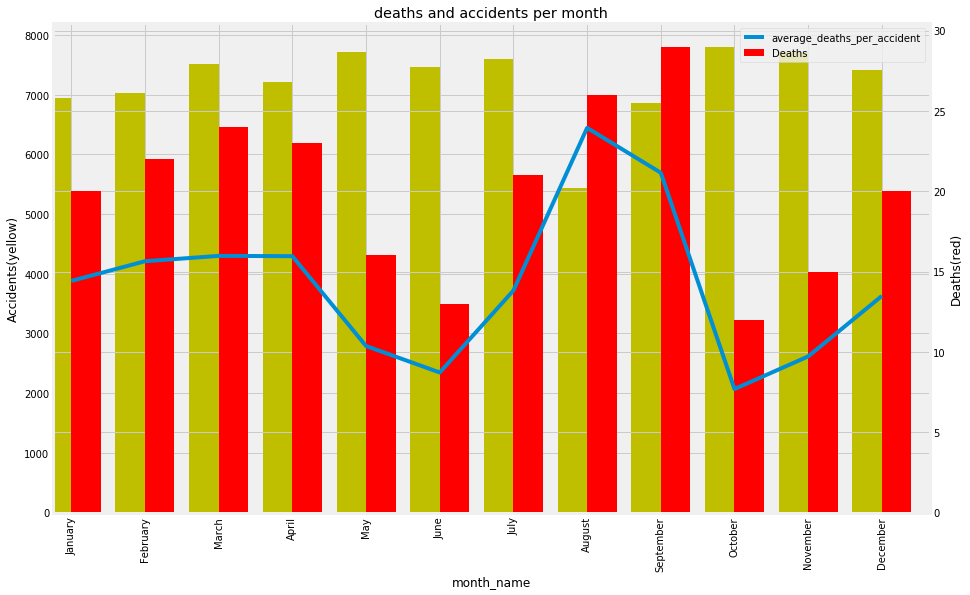

In [10]:
mes['average_deaths_per_accident'] = mes['average']*5000
#mes['average_target_per_accident'] = (mes['target']/mes['accidents_per_month'])*1000
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
#plt.bar(shift, accidents_per_shift, color ='r', ax=ax, width=width, position=1)
mes['accidents_per_month'].plot(kind='bar', color='y', ax=ax, width=width, position=1, label='Accidents')
mes['deaths_per_month'].plot(kind='bar', color='r', ax=ax2, width=width, position=0, label='Deaths')
#mes['average_target_per_accident'].plot(kind='line')
mes['average_deaths_per_accident'].plot(kind='line')
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
plt.title('deaths and accidents per month')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_month2_2018.png');

###Summers are more dangerous

## 3. Deads/Accidents per week day. Deads per accident per week day.
### What happens during weekends

In [12]:
setmana = accidents.groupby('weekday_name').agg({'#_deaths': 'sum', 'incident_#': 'count'})
setmana = setmana.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
setmana.columns = ['deaths_per_weekday', 'accidents_per_weekday']
setmana

,deaths_per_weekday,accidents_per_weekday
weekday_name,,
Monday,42.0,13104
Tuesday,27.0,13712
Wednesday,35.0,14087
Thursday,34.0,14163
Friday,44.0,14976
Saturday,41.0,9427
Sunday,18.0,7217


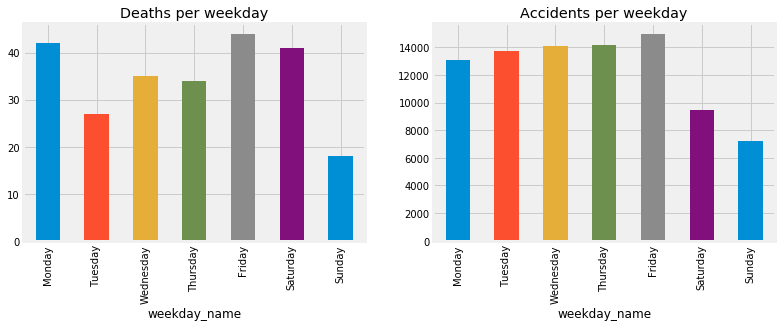

In [16]:
setmana['average'] = setmana['deaths_per_weekday']/ setmana['accidents_per_weekday']
#setmana['average_target'] = setmana['target']/ setmana['accidents_per_weekday']
fig, axes = plt.subplots(1,2, figsize=(12,4))
setmana['deaths_per_weekday'].plot(kind='bar', ax=axes[0], title='Deaths per weekday');
setmana['accidents_per_weekday'].plot(kind='bar', ax=axes[1], title='Accidents per weekday');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_weekday_2018.png');

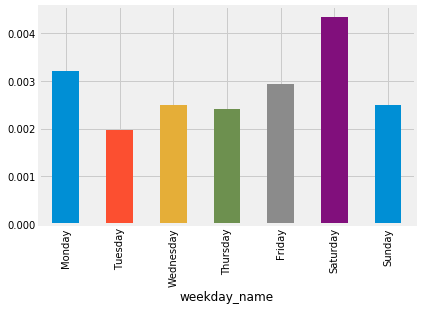

In [18]:

setmana['average'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_weekday_2018.png');

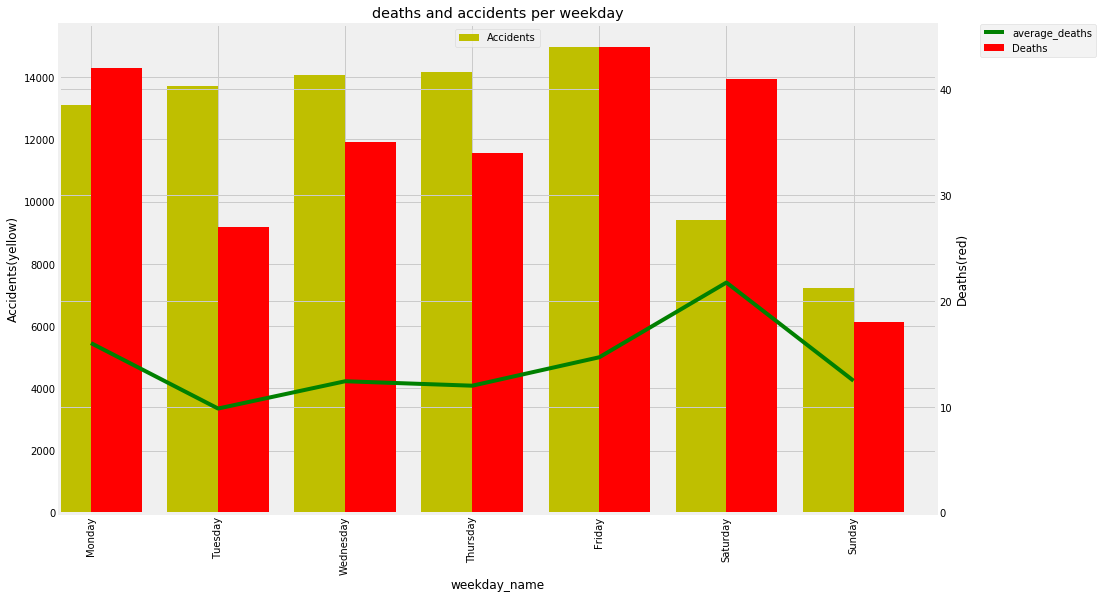

In [20]:
setmana['average_deaths_per_accident'] = setmana['average'] * 5000
#setmana['average_target_per_accident'] = setmana['average_target'] * 1000
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

setmana['accidents_per_weekday'].plot(kind='bar', color='y', ax=ax, width=width, position=1, label='Accidents')
setmana['deaths_per_weekday'].plot(kind='bar', color='r', ax=ax2, width=width, position=0, label='Deaths')
#setmana['average_target_per_accident'].plot(label='average_target')
setmana['average_deaths_per_accident'].plot(kind='line', label='average_deaths',color='g')
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
# lines = ax.get_lines() + ax2.get_lines()
# ax.legend(lines, [line.get_label() for line in lines], loc='upper center')
ax.legend(['Accidents'], loc='upper center')
plt.title('deaths and accidents per weekday')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.savefig('./charts/accidents_deaths_per_weekday2_2018.png');

### Watchout Monday and Saturday

## What about the weekend

# It is risky to mix weekday with shift because you are splitting the shift

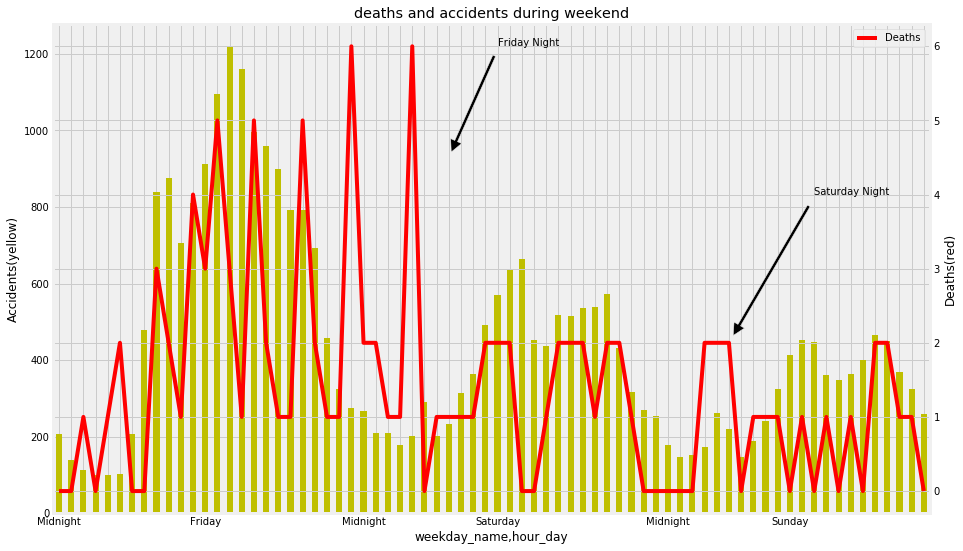

In [18]:
squad = []
for i in range(0,25):
    if i == 0:
        squad.append('Midnight')
    else:
        squad.append('')
        
squad = squad *3
#ax1.set_xticks(x1)
#ax1.set_xticklabels(squad, minor=False, rotation=45
squad[12] = 'Friday'
squad[36] = 'Saturday'
squad[60] = 'Sunday'
weekend =  accidents.loc[accidents['weekday_name'].isin(['Friday', 'Saturday', 'Sunday']), :]
weekend_accidents = weekend.groupby(['weekday_name', 'hour_day']).count()['incident_#']
weekend_deaths = weekend.groupby(['weekday_name', 'hour_day']).sum()['#_deaths']
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
weekend_accidents.plot(kind='bar', color='y', ax=ax, label='Accidents')
weekend_deaths.plot(kind='line', color='r', ax=ax2, label='Deaths')
#plt.plot(weekend_reindex_accidents)
#plt.bar(shift, deads_per_shift, color='b', ax=ax2, position=0)
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
ax.set_xticklabels(squad, rotation= 360)
plt.annotate('Friday Night', xy=(32, 4.5), xytext=(36, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.annotate('Saturday Night', xy=(55, 2), xytext=(62, 4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.title('deaths and accidents during weekend')
plt.legend()
plt.legend()
plt.savefig('./charts/accidents_deaths_per_weekend2_2018.png'); 

## 4. Deads/Accidents per hour of the day.


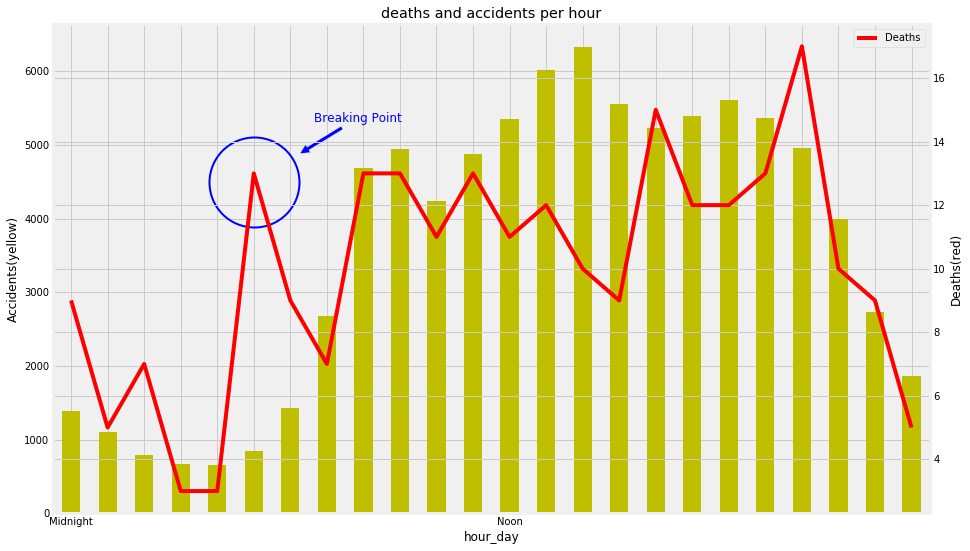

In [19]:
squad2 = []
for i in range(0,24):
    if i == 0:
        squad2.append('Midnight')
    elif i == 12:
        squad2.append('Noon')
    else:
        squad2.append('')

deaths_per_hour =  accidents.groupby('hour_day').sum()['#_deaths']
accidents_per_hour = accidents.groupby('hour_day').count()['incident_#']

fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
accidents_per_hour.plot(kind='bar', color='y', ax=ax, label='Accidents')
deaths_per_hour.plot(kind='line', color='r', ax=ax2, label='Deaths')
#plt.plot(weekend_reindex_accidents)
#plt.bar(shift, deads_per_shift, color='b', ax=ax2, position=0)
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
ax.set_xticklabels(squad2, rotation= 360)
circle_rad = 45
point = (5, 4500)
ax.plot(point[0], point[1], 'o',
        ms=circle_rad * 2, mec='b', mfc='none', mew=2)
ax.annotate('Breaking Point', xy=point, xytext=(60, 60),
            textcoords='offset points',
            color='b', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=circle_rad * 1.2)
)
plt.title('deaths and accidents per hour')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_hour_2018.png'); 

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


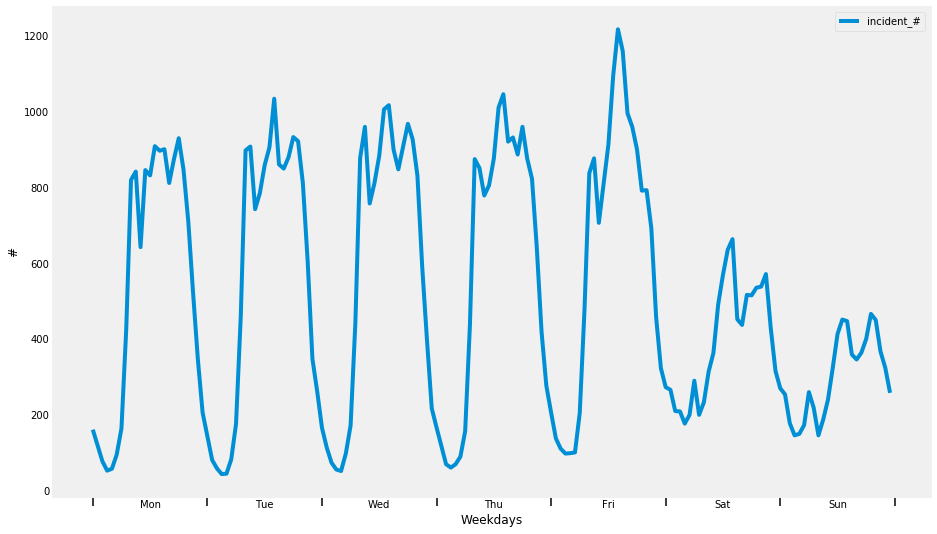

In [23]:
daily_hour = accidents.groupby(['weekday_name', 'hour_day']).agg({'#_deaths': 'sum', 'incident_#': 'count'})
#prova.reorder_levels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_hour = daily_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], level=0)
sq = [x for x in ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
from matplotlib.ticker import MultipleLocator, FuncFormatter, NullFormatter
ax = daily_hour.plot(y=['incident_#'], figsize=(14,9))
ax.set_ylabel("#")
ax.set_xlabel("Weekdays")
ax.grid()
# Now we assume that there is data for every hour and day present
assert len(daily_hour) == 7*24
# Hence we can tick the axis with multiples of 24h
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(1))

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def tick(x,pos):
    if x % 24 == 12:
        return days[int(x)//24]
    else:
        return ""
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(FuncFormatter(tick))
ax.tick_params(which="major", axis="x", length=10, width=1.5)
plt.show()




In [26]:
### Hour of every day with more accidents
daily_hour_reindex = daily_hour.reset_index()
for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    maxim = (daily_hour_reindex.loc[daily_hour_reindex['weekday_name'] == i, ['incident_#']].max()).values
    #print(i,int(maxim))
    hora= daily_hour_reindex.loc[(daily_hour_reindex['weekday_name'] == i) & (daily_hour_reindex['incident_#'] == float(maxim))]['hour_day']
    print(i, 'hour of max accidents:',int(hora), 'hours')

       

Monday hour of max accidents: 18 hours
Tuesday hour of max accidents: 14 hours
Wednesday hour of max accidents: 14 hours
Thursday hour of max accidents: 14 hours
Friday hour of max accidents: 14 hours
Saturday hour of max accidents: 14 hours
Sunday hour of max accidents: 19 hours


In [27]:
for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    maxim = (daily_hour_reindex.loc[daily_hour_reindex['weekday_name'] == i, ['#_deaths']].max()).values
    print(i,int(maxim))
    hora= daily_hour_reindex.loc[(daily_hour_reindex['weekday_name'] == i) & (daily_hour_reindex['#_deaths'] == int(maxim))]['hour_day']
    print(i, 'hour of max deths:',hora.values)
    #print i

Monday 4
Monday hour of max deths: [ 9. 11. 16.]
Tuesday 3
Tuesday hour of max deths: [ 9. 14. 17.]
Wednesday 5
Wednesday hour of max deths: [20.]
Thursday 3
Thursday hour of max deths: [ 8. 14. 16. 18. 19.]
Friday 5
Friday hour of max deths: [13. 16. 20.]
Saturday 6
Saturday hour of max deths: [0. 5.]
Sunday 2
Sunday hour of max deths: [ 5.  6.  7. 19. 20.]


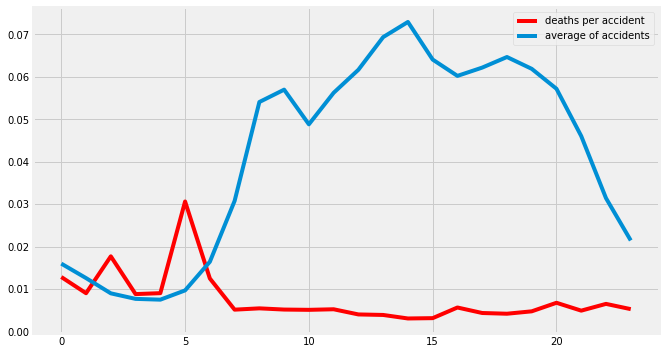

In [20]:
average = []
average_total = []
for i, t in zip(deaths_per_hour, accidents_per_hour):
    average.append(i/t)
    average_total.append(t/len(accidents))

average_adjusted = []

for item in average:
    
    average_adjusted.append(item*2)
    
    
plt.figure(figsize=(10,6))    
plt.plot(accidents_per_hour.index, average_adjusted, color = 'r', label='deaths per accident');
plt.plot(accidents_per_hour.index, average_total, label ='average of accidents')
plt.legend()
plt.savefig('./charts/average_per_hour_2018.png')

## 5. Deads/Accidents per district. 


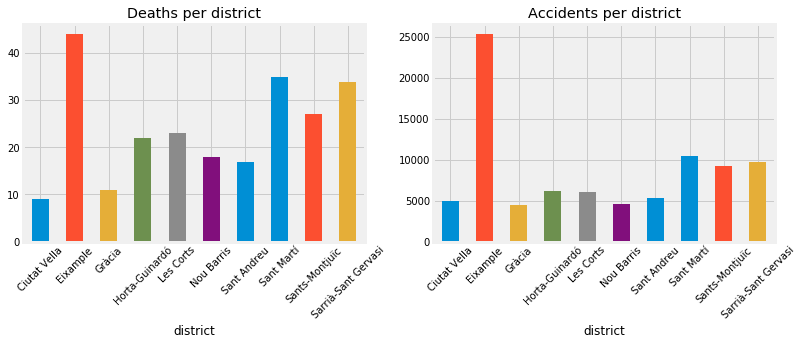

In [29]:
deads_per_district = accidents[accidents['district'] != 'Desconegut'].groupby('district').sum()['#_deaths']
accidents_per_district = accidents[accidents['district'] != 'Desconegut'].groupby('district').count()['incident_#']
fig, axes = plt.subplots(1,2, figsize=(12,4))
deads_per_district.plot(kind='bar', ax=axes[0], title='Deaths per district',rot=45);
#plt.line(accidents_per_district.index, average_1000, c='r')
accidents_per_district.plot(kind='bar', ax=axes[1], title='Accidents per district', rot=45);
#deads_per_weekday[['Friday', 'Saturday', 'Sunday']].plot(kind='bar');
plt.savefig('./charts/deaths_accidents_per_district_2018.png')

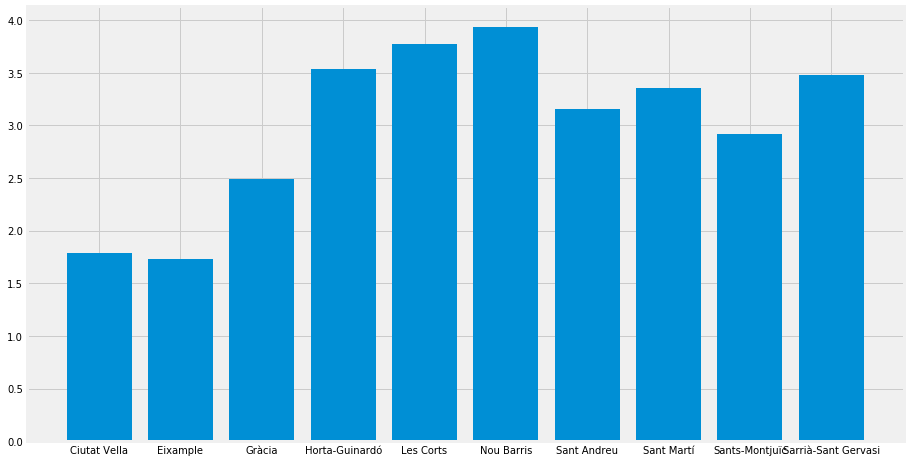

In [31]:

average = []
average_1000 = []
for i, t in zip(deads_per_district, accidents_per_district):
    average.append(i/t)
    average_1000.append((i/t)*1000)
    
plt.figure(figsize=(14,8))    
plt.bar(accidents_per_district.index, average_1000);
plt.savefig('./charts/average_per_district_2018.png')

In [32]:
district = pd.DataFrame(accidents_per_district)
district.index = accidents_per_district.index
district['number_of_deaths'] = deads_per_district.values
#district['number_of_accidents'] = accidents_per_district.values
district.rename(columns={'incident_#':'accidents'}, inplace=True)

district['average_deaths/accidents'] = average
district.sort_values('average_deaths/accidents', ascending=False)

,accidents,number_of_deaths,average_deaths/accidents
district,,,
Nou Barris,4576,18.0,0.003934
Les Corts,6093,23.0,0.003775
Horta-Guinardó,6222,22.0,0.003536
Sarrià-Sant Gervasi,9779,34.0,0.003477
Sant Martí,10419,35.0,0.003359
Sant Andreu,5389,17.0,0.003155
Sants-Montjuïc,9252,27.0,0.002918
Gràcia,4416,11.0,0.002491
Ciutat Vella,5025,9.0,0.001791


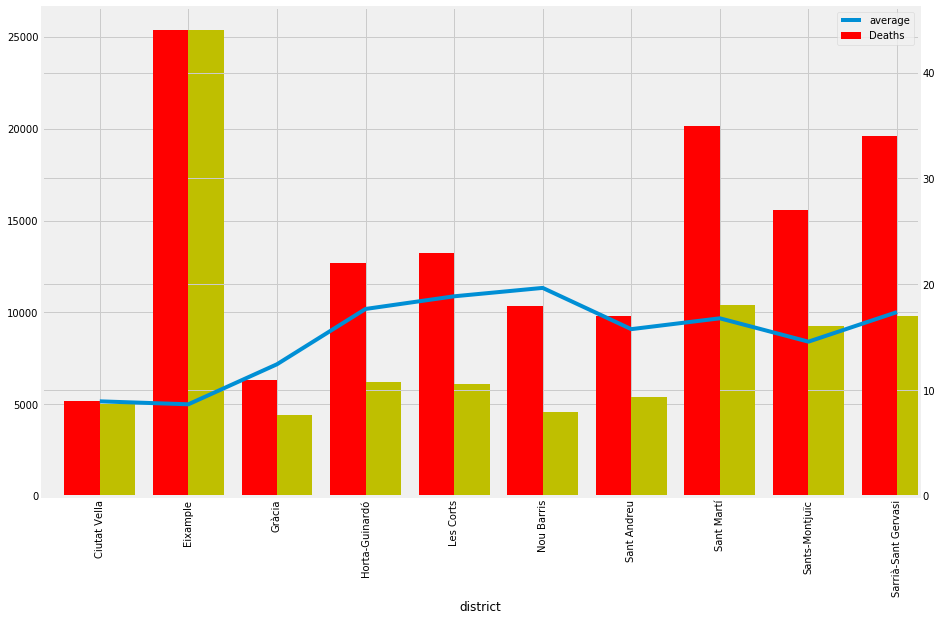

In [33]:

fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
district['average'] = 5000 * district['average_deaths/accidents']
width = 0.4
district['accidents'].plot(kind='bar', color='y', ax=ax, position=0, width= width, label='Accidents')
district['number_of_deaths'].plot(kind='bar', color='r', ax=ax2, position=1, width=width, label='Deaths');
district['average'].plot(kind='line')
plt.legend()
plt.savefig('./charts/ratio_per_district_2018.png');

### About the deads, minor injures, severely injured and victims

In [34]:
accidents['#_deaths'] = accidents['#_deaths'].astype(int)
taula = pd.DataFrame(accidents.groupby('#_deaths').count()['incident_#'])
taula  = taula.rename(columns={"incident_#": "amount of accidents"})
taula['Percentage over total'] = (taula['amount of accidents']/len(accidents)) *100
taula['Percentage over total'] = ['{:,.4f}%'.format(x) for x in taula['Percentage over total']]
taula

,amount of accidents,Percentage over total
#_deaths,,
0,86453,99.7312%
1,227,0.2619%
2,4,0.0046%
3,2,0.0023%


In [35]:
### Let's focus only in the number of deads. It is clear to see how the few accidnets
### with a big number of deads can change everything
taula2 = pd.DataFrame((accidents[accidents['#_deaths'] > 0]).groupby(['#_deaths']).count()['incident_#'])
taula2  = taula2.rename(columns={"incident_#": "amount_of_accidents"})
taula2['percentage_over_total'] = (taula2['amount_of_accidents']/taula2['amount_of_accidents'].sum()) *100
taula2['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in taula2['percentage_over_total']]
taula2['total_number_deaths'] = taula2['amount_of_accidents'] * taula2.index
taula2['percentage_over_deaths'] = (taula2['total_number_deaths']/taula2['total_number_deaths'].sum()) *100
taula2['percentage_over_deaths'] = ['{:,.4f}%'.format(x) for x in taula2['percentage_over_deaths']]

taula2

,amount_of_accidents,percentage_over_total,total_number_deaths,percentage_over_deaths
#_deaths,,,,
1,227,97.4249%,227,94.1909%
2,4,1.7167%,8,3.3195%
3,2,0.8584%,6,2.4896%


In [38]:
accidents['minor_injuries'] = accidents['minor_injuries'].astype(int)
minor = pd.DataFrame(accidents.groupby('minor_injuries').count()['incident_#'])
minor = minor.rename(columns={'incident_#': "number_of_accidents"})
minor['percentage_over_total'] = (minor['number_of_accidents']/len(accidents))*100
minor['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in minor['percentage_over_total']]
minor['accumulative'] = (minor['number_of_accidents'].cumsum()/len(accidents))*100
minor['accumulative'] = ['{:,.2f}%'.format(x) for x in minor['accumulative']]
minor[0:10]

,number_of_accidents,percentage_over_total,accumulative
minor_injuries,,,
0,9216,10.6315%,10.63%
1,60440,69.7229%,80.35%
2,13226,15.2574%,95.61%
3,2380,2.7455%,98.36%
4,852,0.9829%,99.34%
5,323,0.3726%,99.71%
6,133,0.1534%,99.87%
7,51,0.0588%,99.93%
8,28,0.0323%,99.96%


In [41]:
accidents['severe_injuries'] = accidents['severe_injuries'].astype(int)
greu = pd.DataFrame(accidents.groupby('severe_injuries').count()['incident_#'])
greu = greu.rename(columns={'incident_#': "number_of_accidents"})
greu['percentage_over_total'] = (greu['number_of_accidents']/len(accidents))*100
greu['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in greu['percentage_over_total']]
greu

,number_of_accidents,percentage_over_total
severe_injuries,,
0,84696,97.7044%
1,1885,2.1745%
2,91,0.1050%
3,12,0.0138%
4,2,0.0023%


In [42]:
accidents['amount_victims'] = accidents['amount_victims'].astype(int)
total_amount = pd.DataFrame(accidents.groupby('amount_victims').count()['incident_#'])
total_amount = total_amount.rename(columns={'incident_#': "number_of_accidents"})
total_amount['percentage_over_total'] = (total_amount['number_of_accidents']/len(accidents))*100
total_amount['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in total_amount['percentage_over_total']]
total_amount['accrued'] = total_amount['number_of_accidents'].cumsum()/len(accidents) * 100
total_amount['accrued'] = ['{:,.4f}%'.format(x) for x in total_amount['accrued']]
total_amount[0:10]

,number_of_accidents,percentage_over_total,accrued
amount_victims,,,
0,7586,8.7511%,8.7511%
1,61557,71.0115%,79.7626%
2,13619,15.7107%,95.4733%
3,2454,2.8309%,98.3042%
4,885,1.0209%,99.3252%
5,323,0.3726%,99.6978%
6,138,0.1592%,99.8570%
7,55,0.0634%,99.9204%
8,31,0.0358%,99.9562%


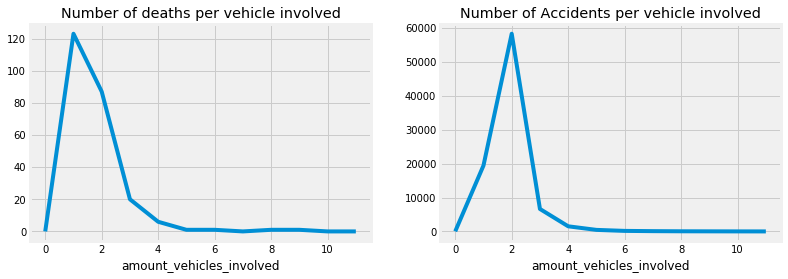

In [43]:
accidents['amount_vehicles_involved'] = accidents['amount_vehicles_involved'].astype(int)
deads_number_vehicles = accidents.groupby('amount_vehicles_involved').sum()['#_deaths']
accidents_number_vehicles = accidents.groupby('amount_vehicles_involved').count()['#_deaths']
fig, axes = plt.subplots(1,2, figsize=(12,4))

deads_number_vehicles[0:12].plot(kind='line', ax=axes[0],\
                                 title="Number of deaths per vehicle involved")
accidents_number_vehicles[0:12].plot(kind='line', ax=axes[1],\
                                 title="Number of Accidents per vehicle involved")

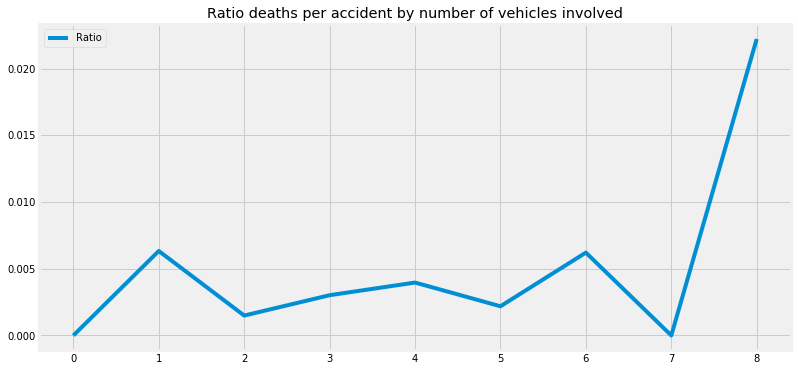

In [44]:
ratio = []
for x, y in zip(deads_number_vehicles, accidents_number_vehicles):
    ratio.append(x/y)
ratio
max_ratio = 0
number_vehicles =  0
for x, y in zip(ratio, deads_number_vehicles.index):
    if x > max_ratio:
        max_ratio = x
        number_vehicles = y
max_ratio, number_vehicles

plt.figure(figsize=(12, 6))
plt.xticks(range(0,17))
plt.title('Ratio deaths per accident by number of vehicles involved')
plt.plot(accidents_number_vehicles.index[0:9], ratio[0:9], label= 'Ratio')
plt.legend()
plt.savefig('./charts/ratio_deaths_accidents_vehicles_2018.png');

In [45]:
vehicles = pd.DataFrame(accidents.groupby('amount_vehicles_involved').count()['incident_#'])
columns = ['number_of_accidents']
vehicles.columns = columns
vehicles['average_accidents'] = vehicles['number_of_accidents']/len(accidents)
vehicles['average_accidents_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['average_accidents']]
vehicles['accrued_accidents'] = vehicles['number_of_accidents'].cumsum()/len(accidents)
vehicles['accrued_accidents_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['accrued_accidents']]
vehicles['number_of_deaths'] = (accidents.groupby('amount_vehicles_involved').sum()['#_deaths']).values
vehicles['average_deaths'] = vehicles['number_of_deaths']/accidents['#_deaths'].sum()
vehicles['average_deaths_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['average_deaths']]
vehicles['accrued_deaths'] = vehicles['number_of_deaths'].cumsum()/accidents['#_deaths'].sum()
vehicles['accrued_deaths_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['accrued_deaths']]

In [46]:
vehicles.drop(['average_accidents', 'average_deaths', 'accrued_accidents', 'accrued_deaths'], axis=1)[0:10]

,number_of_accidents,average_accidents_%,accrued_accidents_%,number_of_deaths,average_deaths_%,accrued_deaths_%
amount_vehicles_involved,,,,,,
0,26,0.0300%,0.0300%,0,0.0000%,0.0000%
1,19425,22.4085%,22.4385%,123,51.0373%,51.0373%
2,58287,67.2392%,89.6777%,87,36.0996%,87.1369%
3,6626,7.6437%,97.3214%,20,8.2988%,95.4357%
4,1513,1.7454%,99.0667%,6,2.4896%,97.9253%
5,457,0.5272%,99.5939%,1,0.4149%,98.3402%
6,161,0.1857%,99.7797%,1,0.4149%,98.7552%
7,86,0.0992%,99.8789%,0,0.0000%,98.7552%
8,45,0.0519%,99.9308%,1,0.4149%,99.1701%


In [49]:
number_total_accidents = len(accidents)
number_total_deaths = int(accidents['#_deaths'].sum())
number_total_accidents, number_total_deaths

(86686, 241)

## Pedestrian Analysis

In [47]:
##Double checking the columns
is_role = [ x for x in accidents.columns if x.startswith('is_role')]
for col in is_role:
    print(col, accidents[col].unique())

is_role_non_existing [1 0]
is_role_driver [0 1]
is_role_pedestrian [0 1]
is_role_passenger [0 1]


### The field 'pedestrian_cause' explains how th pedestrian is involved in the accident. 
#### First, in how many accidents there was a pedestrian involved?

Number of accidents with pedestrain:  10267
Percentage over total:  11.84 %
Number of deaths in accidents with pedestrain:  100
Percentage over total:  41.49 %
Percentage of accidents with pedestrian of unknown cause:  31.89 %
Percentage of accidents with pedestrains where the pedestrian is not reponsible:  25.91 %
Rest of causes and its average: 


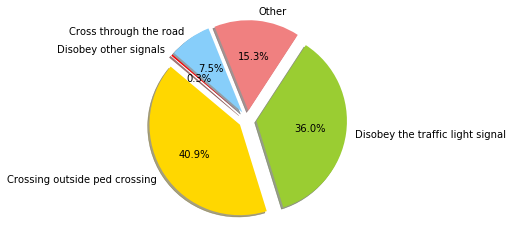

In [57]:
# pedestrian = pd.DataFrame(accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause')['incident_#'].count())
# pedestrian.columns = ['number_accidents']
# pedestrian['number_deaths'] = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause')['#_deaths'].sum().values
pedestrian = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause').agg({'incident_#': 'count', '#_deaths': 'sum'})
pedestrian.columns = ['number_accidents', 'number_deaths']
print("Number of accidents with pedestrain: ", pedestrian['number_accidents'].sum())
print("Percentage over total: ", round((pedestrian['number_accidents'].sum()/number_total_accidents)*100,2),'%')
print("Number of deaths in accidents with pedestrain: ", pedestrian['number_deaths'].sum())
print("Percentage over total: ", round((pedestrian['number_deaths'].sum()/number_total_deaths)*100,2),'%')


print('Percentage of accidents with pedestrian of unknown cause: ',\
      round((pedestrian.at['unknown', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')
print('Percentage of accidents with pedestrains where the pedestrian is not reponsible: ',\
      round((pedestrian.at['No peds fault', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')

clean_pedestrian= pedestrian.drop(['unknown', 'No peds fault'])
clean_pedestrian['average_accidents'] = round(clean_pedestrian['number_accidents']/clean_pedestrian['number_accidents'].sum(), 2)*100
clean_pedestrian.sort_values(by='average_accidents', ascending=False, inplace=True)
clean_pedestrian['average_accidents'] = [str(round(x,2)) + '%' for x in clean_pedestrian['average_accidents']]
# print('Out of the ones of known causes where the pedestrian is responsible; What are the causes?',round((pedestrian.drop('unknown').at['No peds fault','incident_#']\
#        /pedestrian.drop('No peds fault')['number_accidents'].sum())*100,2), '%')
#clean_pedestrian.drop('Other')
print("Rest of causes and its average: ")
#clean_pedestrian
labels = list(clean_pedestrian.index)
sizes = list(clean_pedestrian['number_accidents'])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## One Final Note

In [58]:
### Despite "Crossing
print("Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round(((1772+1561)/pedestrian['number_accidents'].sum())*100, 2),'%')
print("Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round((52/pedestrian['number_deaths'].sum())*100, 2),'%')

Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 32.46 %
Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 52.0 %


# Vehicles

In [59]:
is_vehicle_list = [x for x in accidents.columns if 'is_vehicle' in x][0:9]
#is_vehicle_list = [x.strip('_')[-1] for x in is_vehicle_list]
#motorbike
print("Number of accidents with motorbikes: ", len(accidents[accidents['is_vehicle_Motorbike'] == 1]))
print("Percentage of accidents with motorbikes: ",
      round((len(accidents[accidents['is_vehicle_Motorbike'] == 1])/number_total_accidents)*100, 2), '%')

Number of accidents with motorbikes:  42140
Percentage of accidents with motorbikes:  48.61 %


In [63]:
df_vehicle = pd.DataFrame(index=is_vehicle_list)
for item in is_vehicle_list:
    df_vehicle.at[item,'number_deceased'] = accidents[accidents[item] == 1]['#_deaths'].sum()
    df_vehicle.at[item,'number_accidents'] = accidents[accidents[item] == 1]['incident_#'].count()
    df_vehicle.at[item,'avg_accidents_per_vehicle'] = (accidents[accidents[item] == 1]['incident_#'].count()/number_total_accidents )*100
    df_vehicle.at[item, 'avg_deaths_per_vehicle'] = (accidents[accidents[item] == 1]['#_deaths'].sum()/number_total_deaths)*100
df_vehicle.index = [x.split('_')[-1] for x in df_vehicle.index]
df_vehicle

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle
unknown,0.0,7590.0,8.755739,0.000000
Motorbike,143.0,42140.0,48.612233,59.336100
Car,53.0,16732.0,19.301848,21.991701
Moped,9.0,9557.0,11.024848,3.734440
Van,5.0,2267.0,2.615186,2.074689
Other vehicles,16.0,3306.0,3.813765,6.639004
Bicycle,10.0,5144.0,5.934061,4.149378
Bus,17.0,3128.0,3.608426,7.053942
Truck,14.0,492.0,0.567566,5.809129


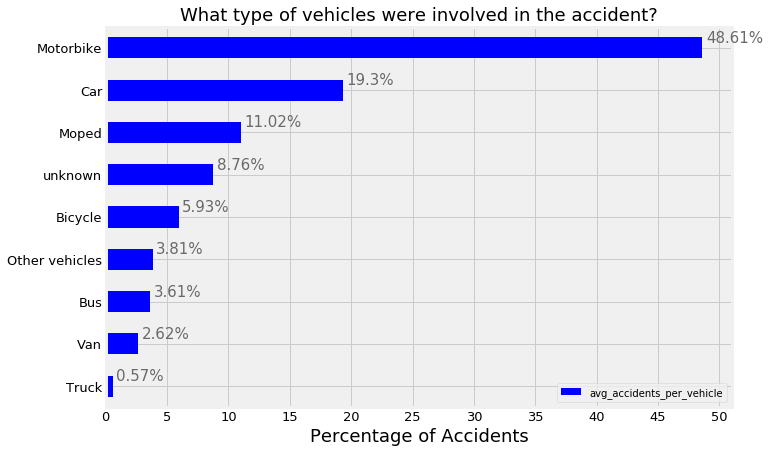

In [65]:


ax = df_vehicle.sort_values('avg_accidents_per_vehicle').plot(kind='barh', y = 'avg_accidents_per_vehicle',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved in the accident?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()


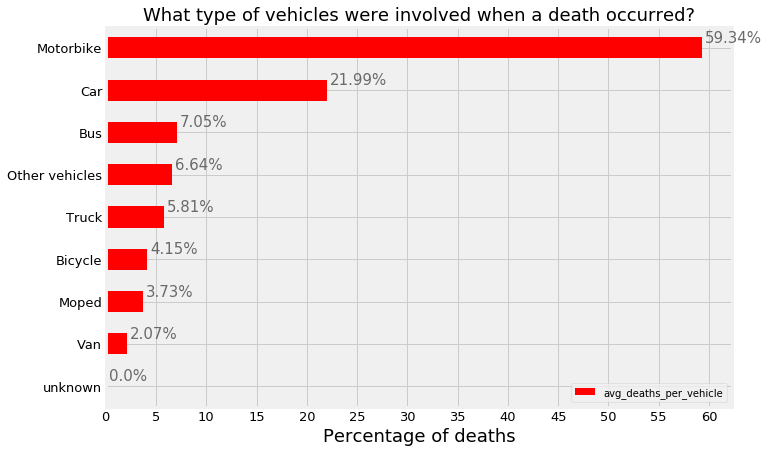

In [311]:

ax = df_vehicle.sort_values('avg_deaths_per_vehicle').plot(kind='barh', y = 'avg_deaths_per_vehicle', figsize=(10,7),
                                        color="red", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved when a death occurred?", fontsize=18)
ax.set_xlabel("Percentage of deaths", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

In [66]:
# I will compared the values for the most interested vehicles:
#     Motorbikes, Cars, Moped,Bus and Truck
interesting =['Motorbike', 'Car', 'Bus', 'Truck', 'Moped', 'Bicycle']
not_interesting = [x for x in df_vehicle.index if x not in interesting]
df_vehicle_short = df_vehicle.drop(not_interesting)
df_vehicle_short

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle
Motorbike,143.0,42140.0,48.612233,59.336100
Car,53.0,16732.0,19.301848,21.991701
Moped,9.0,9557.0,11.024848,3.734440
Bicycle,10.0,5144.0,5.934061,4.149378
Bus,17.0,3128.0,3.608426,7.053942
Truck,14.0,492.0,0.567566,5.809129


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


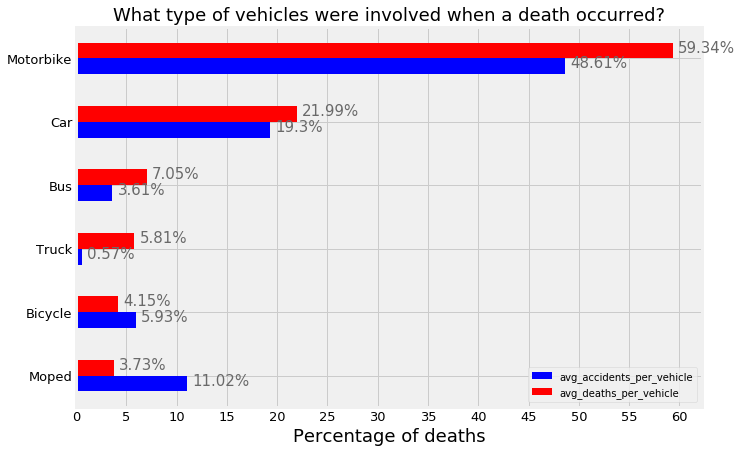

In [329]:
ax = df_vehicle_short.sort_values('avg_deaths_per_vehicle').plot(kind='barh', y = ['avg_accidents_per_vehicle','avg_deaths_per_vehicle'], figsize=(10,7),
                                        color=["blue","red"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved when a death occurred?", fontsize=18)
ax.set_xlabel("Percentage of deaths", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.5, i.get_y()+.1, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

# Finally, what is the deadliest vehicle?
## Let's divide de amount of deaths in accidents where such a vehicle took part by the number of accidents in which the vehicle was involved

In [102]:
df_vehicle['deadly_ratio'] =(df_vehicle['number_deceased']/df_vehicle['number_accidents'])*100
df_vehicle

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle,deadly_ratio
unknown,0.0,7590.0,8.755739,0.000000,0.000000
Motorbike,143.0,42140.0,48.612233,59.336100,0.339345
Car,53.0,16732.0,19.301848,21.991701,0.316758
Moped,9.0,9557.0,11.024848,3.734440,0.094172
Van,5.0,2267.0,2.615186,2.074689,0.220556
Other vehicles,16.0,3306.0,3.813765,6.639004,0.483969
Bicycle,10.0,5144.0,5.934061,4.149378,0.194401
Bus,17.0,3128.0,3.608426,7.053942,0.543478
Truck,14.0,492.0,0.567566,5.809129,2.845528


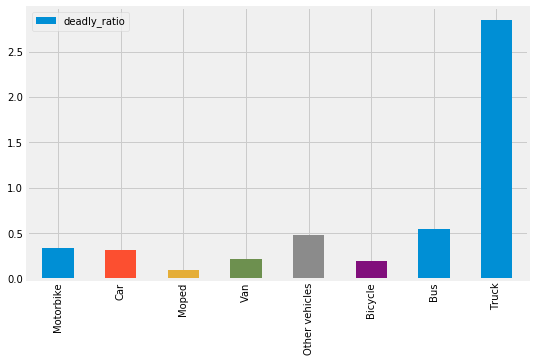

In [104]:
df_vehicle.drop('unknown').plot(kind='bar', y='deadly_ratio', figsize=(8,5));

# Analyzing Driver's Age

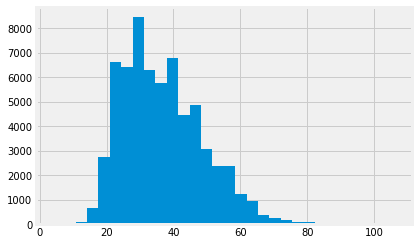

In [68]:
age_driver_known =accidents[accidents['age_driver'] !=0]
plt.hist(age_driver_known['age_driver'], bins=30);

25 Rectangle(xy=(25, 0), width=5, height=10614, angle=0)


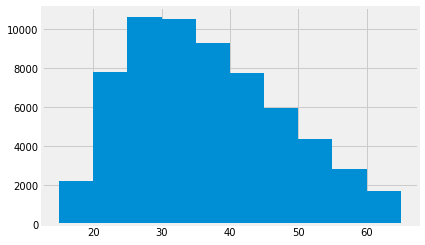

In [69]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_known['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

# Driver's gender

In [97]:
# What about the gender of the driver?

print("Men driving some vehicle in the accident: ",len(accidents[accidents['is_male_driver'] >0]),"\n")
print("Women driving any vehicle in the accident: ",len(accidents[accidents['is_female_driver'] > 0]), '\n')
print("Only men driving in the accident: ",len(accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]), "\n")
print("Only women driving in the accident: ", len(accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]))

Men driving some vehicle in the accident:  47888 

Women driving any vehicle in the accident:  18747 

Only men driving in the accident:  45549 

Only women driving in the accident:  16408


In [109]:
only_man = accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]
only_woman = accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]
only_man.sample()

,index,#_deaths,amount_vehicles_involved,amount_victims,day_month,district,hour_day,incident_#,latitude,longitude,...,is_license_class_regular_license,is_license_class_unknown,is_license_class_motorbike_license,is_license_class_van_license,is_license_class_bus_license,is_license_class_taxis_ambulances_license,is_license_class_moped_permit,is_license_class_non-existing,is_license_class_no_license,senority_avg
82587,5835,0,2,2,9.0,Eixample,16.0,2018S006802,41.403263,2.181096,...,1,0,1,0,0,0,0,1,0,17.0


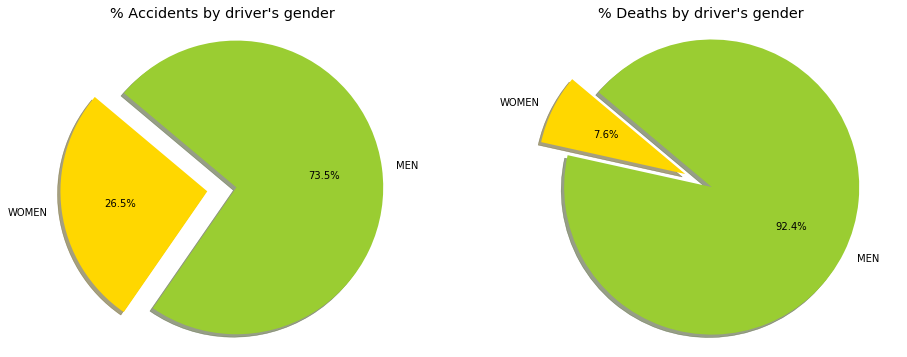

In [125]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['WOMEN', 'MEN']
sizes_acc = [(only_woman['incident_#'].count()/number_total_accidents)*100, (only_man['incident_#'].count()/number_total_accidents)*100]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by driver's gender")
sizes_de = [(only_woman['#_deaths'].sum()/number_total_deaths)*100, (only_man['#_deaths'].sum()/number_total_deaths)*100]
ax2.pie(sizes_de, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by driver's gender")
plt.show()

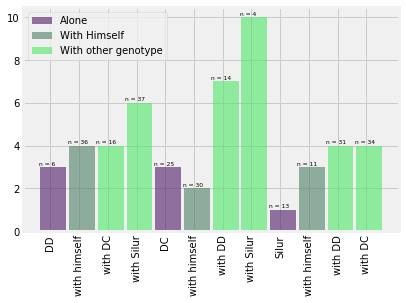

In [165]:
import matplotlib.pyplot as plt
 
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Alone')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='With Himself')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='With other genotype')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['DD', 'with himself', 'with DC', 'with Silur', 'DC', 'with himself', 'with DD', 'with Silur', 'Silur', 'with himself', 'with DD', 'with DC'], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()


In [71]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [116]:
#from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

#output_file("bar_nested_vehicles.html")

#vehicle_list_ =[x.split('_')[-1] for x in is_vehicle_list]
caracs = ['number_accidents', 'number_deaths']

data = {'vehicles' : vehicle_list_,
        'number_accidents'   : df_vehicle['avg_accidents_per_vehicle'],
        'number_deaths'   : df_vehicle['avg_deaths_per_vehicle']}

palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (is_vehicle, carac) for is_vehicle in vehicle_list_ for carac in caracs ]
counts = sum(zip(data['number_accidents'], data['number_deaths']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=350, title="Accidents/Deaths by vehicle",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=caracs, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [48]:
df_vehicles['accidents_vehicle'] = [x[0] for x in deaths_and_vehicles]
deaths_ = [x[1] for x in deaths_and_vehicles]

NameError: name 'deaths_and_vehicles' is not defined

In [574]:
ax.set_ylabel("#")
ax.set_xlabel("time")
ax.grid()
# Now we assume that there is data for every hour and day present
assert len(counts) == 7*24
# Hence we can tick the axis with multiples of 24h
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(1))

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def tick(x,pos):
    if x % 24 == 12:
        return days[int(x)//24]
    else:
        return ""
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(FuncFormatter(tick))
ax.tick_params(which="major", axis="x", length=10, width=1.5)
plt.show()

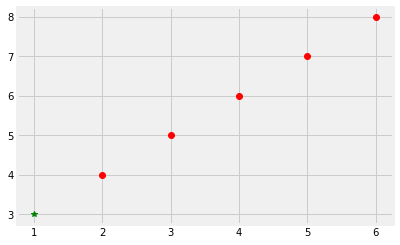

In [639]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

plt.plot(x[1:], y[1:], 'ro')
plt.plot(x[0], y[0], 'g*')

plt.show()